# CS6053 Foundations of Data Science
## Homework 5

Student Name: Allan Porter

Student Netid: Ap5167
***

### Part 1: Critique this plan (8 points)
1\. Your CIO invited his buddy from Tok Aton consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Tok Aton, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Tok Aton says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Tok Aton's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--------------------------------------------------------------------------
                            Targeted Audience Expansion             
                      Prepared by Tok Aton Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Tok Aton) have a large database of consumers who can be targeted.  We will build a predictive model to estimate which of these consumers are the most likely to adopt the product, and then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adoption of the service by a consumer, based on the data on your current customers of this service.  The model will be based on their demographics and their usage of the service. We believe that logistic regression is the best choice of method because it is a tried-and-true statistical modeling technique, and we can easily interpret the coefficients of the model to infer whether the attributes are statistically significant, and whether they make sense. If they are statistically significant and they do make sense, then we can have confidence that the model will be accurate in predicting service uptake. We will apply the model to our large database of consumers, and select out those who have not yet subscribed and whom the LR model predicts to be the most likely to subscribe.  To these we will send the targeted offer. As this is a fixed-profit-per-customer service, this also will in effect rank them by expected profit.
--------------------------------------------------------------------------
```

1.  How many customers adopt the product will not necessarily correlate with the expected revenue gained from them.  Perhaps there are customers who are likely to spend more if they adopt the service, while also being less likely than others to adopt the service in the first place.  The solution would be to either remove the part of the proposal that states that consumers will be ranked by expected profit, or to separately predict how much profit each potential customer will  bring in.   


2. Adoption of service in the first place may not be the best metric in determining who we should send the targeted offer to.  
A better metric would be how much revenue the company expects to make from each 
customer based on their demographic and usage of service data.  A solution would be to 
make the expected amount of revenue per customer the target variable we are predicting.  


3.  Logistic regression is not the best choice here as it only predicts whether the user
will adopt or not adopt the service. Leveraging a model that predicts the probability of
the user adopting the service will be much more effective here.  Therefore in this case linear 
regression or svms decision_function to predict the probability will work better.

4.  Simply checking the coefficients isnt sufficient in determining how good the model is.
We are not looking for statistical significance only when harnessing a model.
We should only have confidence in the model if we see that it scores well on test data. 
The solution would be to split the data into training and test data, evaluate 
the models performance on the test data and then optimize the model accordingly.  




### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

### The dataset and further descriptions can be found here:
https://snap.stanford.edu/data/wiki-RfA.html (Download the dataset from the website)

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [271]:
#code here
import numpy as np
import pandas as pd
import re


In [272]:
line_dict = {}
with open("wiki-RfA.txt","r+") as f:
    lines = f.readlines()
    for line in lines:
        if(line != '\n'):
            line = line[:-1]
            #line = line.strip()
            k,v = line.split(":",1)
            if(k in line_dict.keys()):
                line_dict[k].append(v)
            else:
                line_dict[k] = [v]
                
                
df = pd.DataFrame.from_dict(line_dict)             


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [273]:
df['VOT'] = df['VOT'].astype('int')
df['VOT'] = df['VOT'].apply(lambda x: 0 if(x == -1 or x==0) else 1)

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [274]:
X = df.TXT
y = df.VOT

np.random.seed(42)
cutoff_X = np.random.rand(len(X)) <= .75
X_train = X[cutoff_X]
X_test = X[~cutoff_X]
y_train = y[cutoff_X]
y_test = y[~cutoff_X]


4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=None,    
                             preprocessor=None, 
                             ngram_range=(1,2),
                             stop_words='english', 
                             binary=True
                             )
cv.fit(X_train)
list_of_ngrams_train  = cv.transform(X_train)
list_of_ngrams_test  = cv.transform(X_test)



In [276]:
tf = TfidfVectorizer(tokenizer=None,preprocessor=None, 
                     ngram_range=(1,2),stop_words=None,
                     binary=True
                    )
tf.fit(X_train)
list_of_tfidf_train = tf.transform(X_train)
list_of_tfidf_test = tf.transform(X_test)

In [277]:
print(list_of_tfidf_train.shape)
print(list_of_tfidf_test.shape)

(148692, 772740)
(49583, 772740)


5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

LogisticRegression does better for both the TfidfVectorizer and CountVectorizer.  (The Count Vectorizer and TFidfVectorizer don't seem to signficantly differ in terms of performance here).  This is most likely because Naive Bayes classifier assumes feature independence which might not necessarily be the case here.  Logistic regression doesn't assume feature independence and will adjust the weights if they are not independent.  

/Users/allanporter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/allanporter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


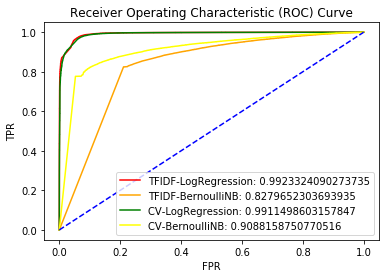

In [278]:
#response here
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


X_train = list_of_tfidf_train
X_test = list_of_tfidf_test
tf_log_model = LogisticRegression()
tf_log_model.fit(X_train,y_train)
tf_log_y_pred = tf_log_model.predict_proba(X_test)[:,1]

tf_log_predictions = [value for value in tf_log_y_pred]
fpr, tpr, thresholds = roc_curve(y_test, tf_log_y_pred)


plt.plot(fpr, tpr, color='red', label=f'TFIDF-LogRegression: {roc_auc_score(y_test, tf_log_y_pred)}')

tf_bn_model = BernoulliNB()
tf_bn_model.fit(X_train,y_train)
tf_bn_ypred = tf_bn_model.predict_proba(X_test)[:,1]
tf_bn_predictions = [value for value in tf_bn_ypred]




fpr, tpr, thresholds = roc_curve(y_test, tf_bn_ypred)
plt.plot(fpr, tpr, color='orange', label=f'TFIDF-BernoulliNB: {roc_auc_score(y_test, tf_bn_ypred)}')

X_train = list_of_ngrams_train
X_test = list_of_ngrams_test


cv_log_model = LogisticRegression()
cv_log_model.fit(X_train,y_train)
cv_log_y_pred = cv_log_model.predict_proba(X_test)[:,1]

cv_log_predictions = [value for value in cv_log_y_pred]
fpr, tpr, thresholds = roc_curve(y_test, cv_log_y_pred)
plt.plot(fpr, tpr, color='green', label=f'CV-LogRegression: {roc_auc_score(y_test, cv_log_y_pred)}')

cv_bn_model = BernoulliNB()
cv_bn_model.fit(X_train,y_train)
cv_bn_ypred = cv_bn_model.predict_proba(X_test)[:,1]
cv_bn_predictions = [value for value in cv_bn_ypred]
fpr, tpr, thresholds = roc_curve(y_test, cv_bn_ypred)
plt.plot(fpr, tpr, color='yellow', label=f'CV-BernoulliNB: {roc_auc_score(y_test, cv_bn_ypred)}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()




Logistic Regression seems to do a better job here as a classifier than BernoulliNB because Naive Bayes classifiers require
feature independence which isnt necessarily present.  

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [279]:
import networkx as nx

srcs = list(df['SRC'].unique())
tgts = list(df['TGT'].unique())
combined_list = srcs + tgts
combined = list(pd.Series(combined_list).unique())


edges = []
for row in df.iterrows():
    src = row[1]['SRC']
    tgt = row[1]['TGT']
    vot = row[1]['VOT']
    edges.append([src,tgt,vot])

    
# Transform the edges into a dataframe to write to file
graph = nx.Graph()
edges_df = pd.DataFrame(edges,columns=['SRC','TGT','VOT'])
graph = nx.from_pandas_edgelist(edges_df, 'SRC', 'TGT', edge_attr='VOT')
graph = nx.convert_node_labels_to_integers(graph)

nx.write_edgelist(graph, "graph.edgelist")


2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [280]:
import networkx as nx
Gwik = nx.read_edgelist("graph.edgelist")


3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [281]:
print(f"Nodes: {len(Gwik.nodes)}")
print(f"Edges: {len(Gwik.edges)}")


Nodes: 11381
Edges: 181999


4\. Compute the degree, betweness and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

Degree centrality will calculate how many nodes a node is connected to and is meaningful here.  
In this graph, nodes tend to have very low degree centralities meaning that they arent generally connected to many nodes.  

Betweenness centrality will calculate how often the node is involved in shortest paths of information in the graph,.
Here this doesnt appear to be very meaningful as most nodes arent connected to many nodes anyway.

Closeness centrality refers to how close a node is to other nodes in the graph.  Since most nodes arent connected
to many of the other nodes, this will not be a very significant metric.  


In [135]:
pd.Series(nx.degree_centrality(Gwik)).describe()

count    10417.000000
mean         0.003463
std          0.006357
min          0.000096
25%          0.000096
50%          0.000672
75%          0.004320
max          0.117608
dtype: float64

In [151]:
pd.Series(nx.betweenness_centrality(Gwik)).describe()

count    10417.000000
mean         0.000029
std          0.000274
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000004
max          0.022683
dtype: float64

In [150]:
pd.Series(nx.closeness_centrality(Gwik)).describe()

count    10417.000000
mean         0.046172
std          0.024762
min          0.000000
25%          0.026071
50%          0.042235
75%          0.063824
max          0.146842
dtype: float64

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (3 points)

Color every edge based on their respective edge attribute values in this case their votes - labeled either 1 or 0.   Assign red if the value is 1 and blue if it is 0.  

/Users/allanporter/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/allanporter/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


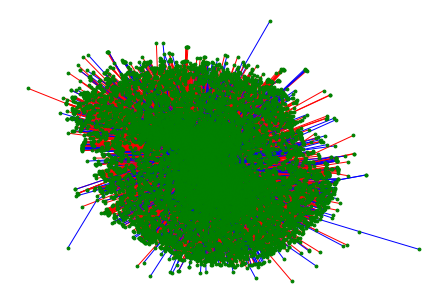

In [282]:
edge_colors = []

for src,tgt in Gwik.edges():
    vot = Gwik[src][tgt]['VOT']
    if(vot == 1):
        edge_colors.append('red')
    else:
        edge_colors.append('blue')

nx.draw(Gwik, node_color='green',node_size=8, with_labels=False,edge_color=edge_colors)

plt.show()

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (Optional, for a bonus: 2 points)

Use a list of colors for resolution value, giving the edge for each entry a separate color depending on if the value is 1 or 0


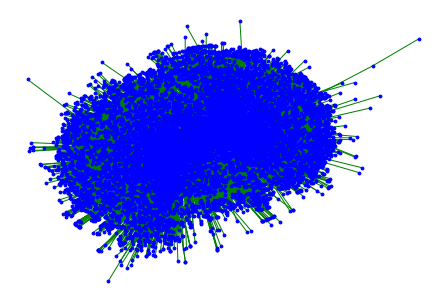

In [283]:
edges2 = []
for row in df.iterrows():
    src = row[1]['SRC']
    tgt = row[1]['TGT']
    res = row[1]['RES']
    edges2.append([src,tgt,res])

    
graph2 = nx.Graph()
edges_df2 = pd.DataFrame(edges,columns=['SRC','TGT','RES'])

graph2 = nx.Graph()
graph2 = nx.from_pandas_edgelist(edges_df2, 'SRC', 'TGT', edge_attr='RES')
graph2 = nx.convert_node_labels_to_integers(graph2)

res_colors = []
for src,tgt in graph2.edges():
    res = graph2[src][tgt]['RES']
    if(res == 1):
        res_colors.append('red')
    else:
        res_colors.append('green')

nx.draw(graph2, node_color='blue',node_size=8, with_labels=False,edge_color=res_colors)

